In [47]:
import pandas as pd 
from rich import print 
import seaborn as sns 
import numpy as np 
import math 
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
from networkx.utils import np_random_state 
from networkx.algorithms import community

In [48]:
import powerlaw

In [49]:
G=nx.read_gexf('final_net.gexf')

# 2) NETWORK CHARACTERIZATION

## 2.1 Basic Measures

In [50]:
#n of Nodes
G.number_of_nodes()

10184

In [51]:
#n of Edges
G.number_of_edges()

11968

In [52]:
G.is_directed()
#G is Undirected 

False

In [ ]:
#di self-loop non ne abbiamo perchè li abbiamo rimossi nella fase di preprocessing
#self-loop nel nostro caso = io retwitto un mio tweet

### 2.1.1 Degree distribution analysis ##

In [53]:
#Average Degree <k>
sum(dict(G.degree()).values())/float(len(G))

2.350353495679497

In [ ]:
#controprova Avg Degree

In [54]:
#Average Degree <k>
avg_degree= 2*G.number_of_edges()/G.number_of_nodes()

In [56]:
print(avg_degree)

2.350353495679497

In [57]:
maxdegree=max(dict(G.degree()).values())
mindegree=min(dict(G.degree()).values())

In [58]:
print(maxdegree,mindegree)
#Max degree = 1956
#min degree = 1

1956 1

In [59]:
#confrontare avg degree, Max degree, min degree del nostro Real World network con quelle di ER,BA,WS,CM

In [60]:
G.degree()
#elenco di tutti i nodi con i loro degrees ki

DegreeView({'290883': 1, '1471971': 1, '2052911': 5, '2827221': 1, '3688111': 1, '4254951': 1, '4615341': 1, '4937571': 1, '5404582': 1, '5516892': 1, '5749002': 1, '5849252': 1, '6266142': 2, '6691762': 11, '7078452': 1, '7703052': 1, '7777302': 2, '8007502': 1, '8052182': 1, '9063952': 1, '9147152': 1, '9731332': 1, '11025592': 1, '11076222': 1, '11486222': 1, '11567702': 1, '12512292': 1, '12610772': 5, '13301942': 1, '13525132': 1, '13748912': 1, '14118020': 1, '14132126': 2, '14152382': 1, '14214964': 1, '14218303': 1, '14314815': 1, '14410543': 1, '14430522': 1, '14446152': 1, '14449273': 2, '14465456': 1, '14491785': 1, '14496536': 13, '14519073': 2, '14522241': 1, '14535500': 1, '14542602': 1, '14568965': 1, '14615214': 1, '14719297': 1, '14761966': 1, '14804672': 1, '14808213': 2, '14828950': 1, '14834002': 1, '14843373': 2, '14932805': 1, '14944543': 1, '14986544': 1, '15021056': 1, '15029604': 2, '15055787': 1, '15060697': 1, '15074415': 1, '15085192': 1, '15090241': 1, '151

In [61]:
# il nodo con Max degree=1956 è il '27493883'

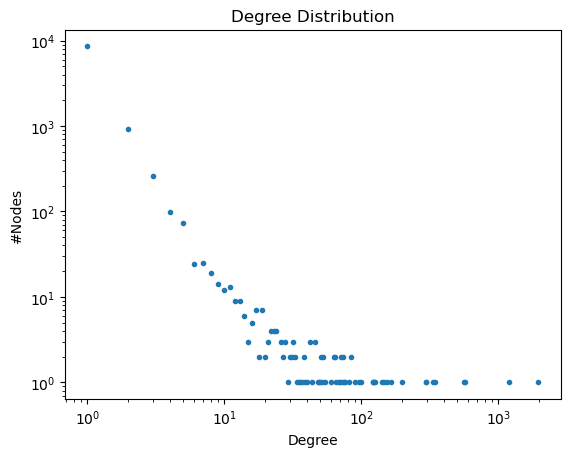

In [62]:
#Degree distribution
hist = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()
#probabilities that a randomly chosen node has degree k 

In [28]:
#Degree distribution più completa..
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

C:\Users\Giulia\AppData\Local\Temp\ipykernel_18416\888721987.py:3: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  M = nx.to_scipy_sparse_matrix(G)
C:\Users\Giulia\AppData\Local\Temp\ipykernel_18416\888721987.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


Calculating best minimal value for power law fit


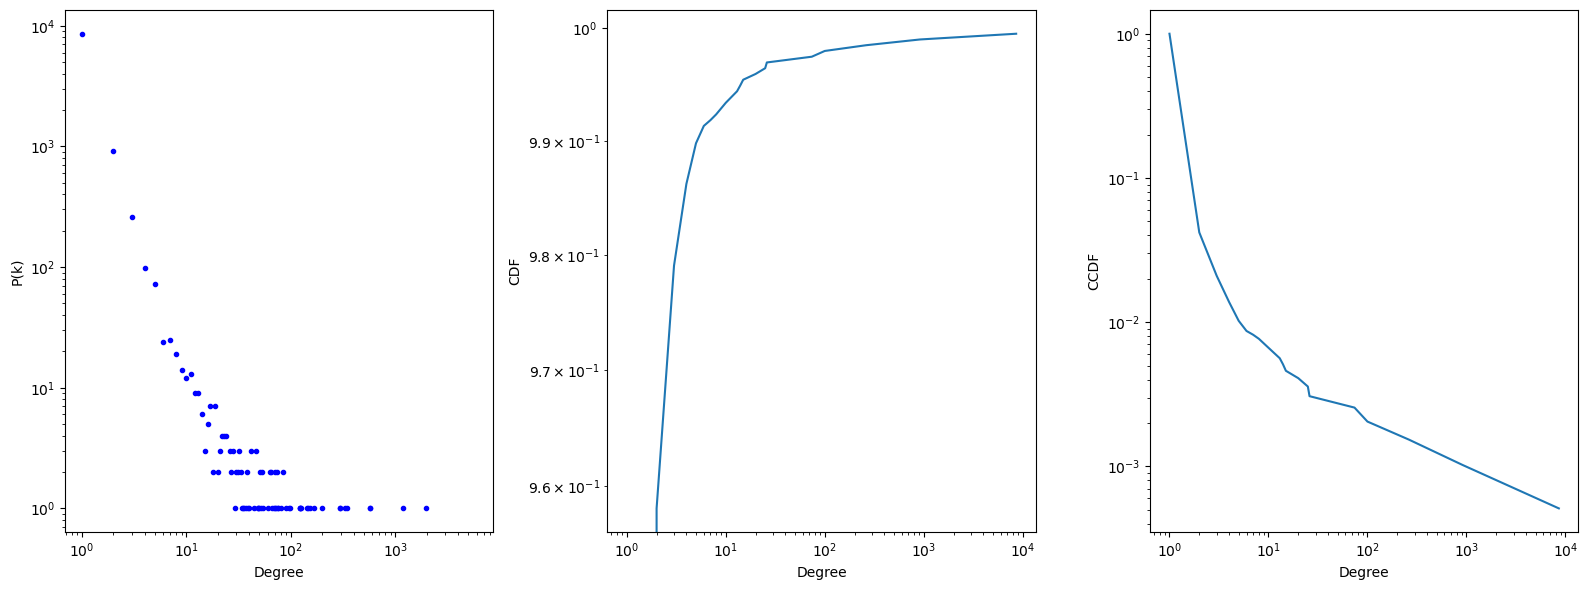

In [29]:
plot_dist(G)

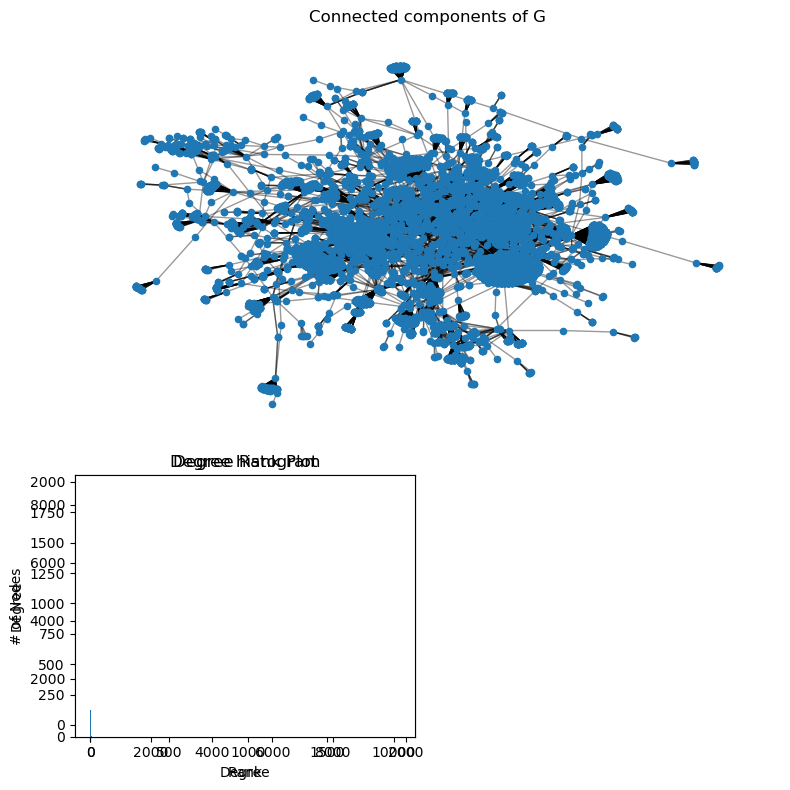

In [30]:
#degree distribution..

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, :2])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

### 2.1.2 Connected component analysis ##

In [63]:
nx.number_connected_components(G)

1

In [64]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)
#H is the largest component 

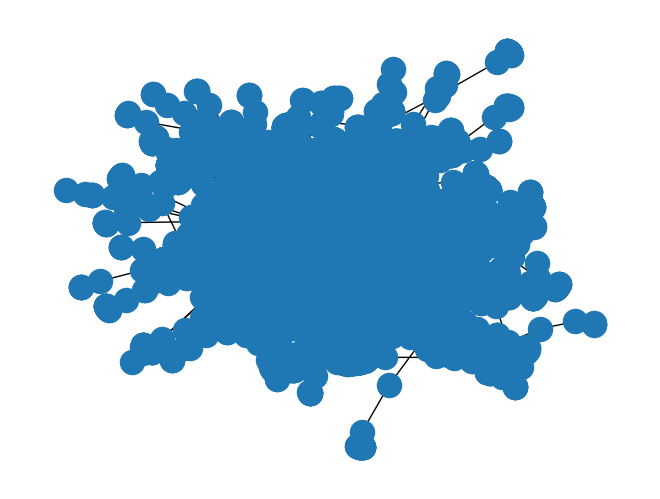

In [17]:
nx.draw(H)

In [65]:
#n of Edges
H.number_of_edges()

11968

In [66]:
#n of Nodes
H.number_of_nodes()

10184

In [20]:
#H largest component coincide con il nostro grafo G

In [82]:
largest_cc = max(nx.connected_components(G), key=len)

In [83]:
print(largest_cc)

{
    '831197912227000320',
    '889197216170115073',
    '822132611137105920',
    '892136417488510976',
    '1079029869487493120',
    '935471753635270656',
    '2340522188',
    '981670711',
    '881578506903314432',
    '1375466640587038722',
    '147401660',
    '103402210',
    '2849226306',
    '2951215268',
    '4765944894',
    '967445134592958464',
    '3216800375',
    '389322218',
    '1499737837620576256',
    '923254340684537861',
    '1283861200607027201',
    '1038593077596839936',
    '442374179',
    '1264568815',
    '2302413804',
    '1363411169784913930',
    '319139187',
    '201421240',
    '1281685256421113861',
    '404840320',
    '1394789157306834954',
    '4127856339',
    '178252338',
    '774208814576828416',
    '68103383',
    '96447774',
    '1019777427499814914',
    '3139558693',
    '3710888693',
    '1026599552843956226',
    '1251931681965080577',
    '4789844485',
    '748943412515237888',
    '455060341',
    '820386153845157889',
    '1305769384510738435',
    '733285407627022337',
    '1631358120',
    '2575462577',
    '280055031',
    '705794300446183424',
    '1359638251875799040',
    '2393202402',
    '838267590',
    '767196281236168704',
    '1159459364731838464',
    '5749002',
    '3145385633',
    '1472955117913653253',
    '795419057487024129',
    '504920310',
    '15029604',
    '4876743205',
    '38165283',
    '2515860935',
    '89219352',
    '19608199',
    '1129691554627706880',
    '1500977376955707394',
    '1048534310695919616',
    '408905990',
    '544639215',
    '1183372237619023872',
    '1340268883459125248',
    '1481792332777377792',
    '787403334558900224',
    '96822790',
    '208716048',
    '789558747190394880',
    '3196596267',
    '803774210271301632',
    '784084496098492416',
    '3318361103',
    '1194614565474095104',
    '795574996995375104',
    '2356329331',
    '144564702',
    '80398898',
    '547106952',
    '1408089578167283721',
    '479851695',
    '609793904',
    '957696518475210752',
    '224588312',
    '860279213986914308',
    '1496764496576012293',
    '2416263080',
    '2986195098',
    '218370194',
    '2502468500',
    '1111362247195017219',
    '1474443157714739203',
    '2958546064',
    '1090163691914444800',
    '1491795722',
    '812029393455431680',
    '15265442',
    '1205218988344655872',
    '728752400790589441',
    '1501308595048230918',
    '1483781580225191936',
    '2918826821',
    '970444675986292736',
    '902356780486930432',
    '1476995891923988483',
    '2296151025',
    '993024575565893632',
    '785139917894606849',
    '1158782965951991808',
    '1180792856769941506',
    '1346282509819113474',
    '554866470',
    '916656611787198465',
    '1078364808',
    '2324759892',
    '824126001936474113',
    '4212575255',
    '1153137397779050496',
    '1357289956125929472',
    '833948277766762496',
    '1031912919532036096',
    '1444041651178164225',
    '868889219447443456',
    '796001849295966209',
    '376362429',
    '1225978945297879041',
    '2593519705',
    '13301942',
    '932104233469562880',
    '1477930118',
    '282642450',
    '2808044466',
    '463911801',
    '999960633960316929',
    '997354591',
    '858270600091111424',
    '1241462736174960640',
    '1424700536255811585',
    '1860031908',
    '3734656704',
    '1339348616',
    '407418136',
    '12610772',
    '3633645673',
    '47517944',
    '930709326',
    '948978698',
    '1700771629',
    '1012961360',
    '3950403972',
    '1151323981',
    '552084514',
    '624351505',
    '1263111444045819905',
    '750781552053878788',
    '2414860857',
    '1252246297001766912',
    '48224749',
    '328028758',
    '1266814420094779394',
    '1304701261812559874',
    '62529894',
    '1135336751667564545',
    '1347173802447302659',
    '2556496194',
    '2980022487',
    '796420190850449408',
    '793236013040693248',
    '326229600',
    '63793432',
    '4786222385',
    '2911346787',
    '754024513516384256',
    '928095560783093762',
  

In [84]:
len(largest_cc)

10184

In [ ]:
#infatti il largest component nel nostro network è composto da 10184 come il nostro network stesso

In [ ]:
#calcolare il largest component anche per ER,BA e WS

### 2.1.3 Path analysis ##

In [ ]:
#SHORTEST PATH= the path with the shortest length between two nodes i.e. the DISTANCE between 2 nodes

In [67]:
nx.diameter(G)
#is the longest shortest path in the graph

18

In [68]:
nx.average_shortest_path_length(G)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto

4.972121353619957

In [69]:
print(nx.average_shortest_path_length(G))

4.972121353619957

### 2.1.4 Clustering Coefficient & Density analysis ##

In [71]:
#triangoli
nx.triangles(G)
#number of triangles that include a node as one vertex

{'290883': 0,
 '1471971': 0,
 '2052911': 2,
 '2827221': 0,
 '3688111': 0,
 '4254951': 0,
 '4615341': 0,
 '4937571': 0,
 '5404582': 0,
 '5516892': 0,
 '5749002': 0,
 '5849252': 0,
 '6266142': 1,
 '6691762': 0,
 '7078452': 0,
 '7703052': 0,
 '7777302': 0,
 '8007502': 0,
 '8052182': 0,
 '9063952': 0,
 '9147152': 0,
 '9731332': 0,
 '11025592': 0,
 '11076222': 0,
 '11486222': 0,
 '11567702': 0,
 '12512292': 0,
 '12610772': 2,
 '13301942': 0,
 '13525132': 0,
 '13748912': 0,
 '14118020': 0,
 '14132126': 0,
 '14152382': 0,
 '14214964': 0,
 '14218303': 0,
 '14314815': 0,
 '14410543': 0,
 '14430522': 0,
 '14446152': 0,
 '14449273': 0,
 '14465456': 0,
 '14491785': 0,
 '14496536': 1,
 '14519073': 0,
 '14522241': 0,
 '14535500': 0,
 '14542602': 0,
 '14568965': 0,
 '14615214': 0,
 '14719297': 0,
 '14761966': 0,
 '14804672': 0,
 '14808213': 0,
 '14828950': 0,
 '14834002': 0,
 '14843373': 0,
 '14932805': 0,
 '14944543': 0,
 '14986544': 0,
 '15021056': 0,
 '15029604': 0,
 '15055787': 0,
 '15060697': 0,

In [ ]:
#per il Global Clustering coefficient = 3xn di triangoli / n di triplets
#mi servirebbe il n tot di triangoli e il n di triplets

In [72]:
#local clustering coeff
nx.clustering(G)
#ratio between the closed triangles that include node i and the potential triangles that node i can form 
#Ci=2xei/kix(ki-1)
#'6266142','16176454','17303858','17378581','18058085','19284888','19765553','21036796','21495530','21567649','21754958','21884679','22407417','22858466','23284066','24021806','25499975','26994187','28830796','31994671','43235064','43345762','43977694','49461561','54999242','55181938','60399177','61399101',

{'290883': 0,
 '1471971': 0,
 '2052911': 0.2,
 '2827221': 0,
 '3688111': 0,
 '4254951': 0,
 '4615341': 0,
 '4937571': 0,
 '5404582': 0,
 '5516892': 0,
 '5749002': 0,
 '5849252': 0,
 '6266142': 1.0,
 '6691762': 0,
 '7078452': 0,
 '7703052': 0,
 '7777302': 0,
 '8007502': 0,
 '8052182': 0,
 '9063952': 0,
 '9147152': 0,
 '9731332': 0,
 '11025592': 0,
 '11076222': 0,
 '11486222': 0,
 '11567702': 0,
 '12512292': 0,
 '12610772': 0.2,
 '13301942': 0,
 '13525132': 0,
 '13748912': 0,
 '14118020': 0,
 '14132126': 0,
 '14152382': 0,
 '14214964': 0,
 '14218303': 0,
 '14314815': 0,
 '14410543': 0,
 '14430522': 0,
 '14446152': 0,
 '14449273': 0,
 '14465456': 0,
 '14491785': 0,
 '14496536': 0.01282051282051282,
 '14519073': 0,
 '14522241': 0,
 '14535500': 0,
 '14542602': 0,
 '14568965': 0,
 '14615214': 0,
 '14719297': 0,
 '14761966': 0,
 '14804672': 0,
 '14808213': 0,
 '14828950': 0,
 '14834002': 0,
 '14843373': 0,
 '14932805': 0,
 '14944543': 0,
 '14986544': 0,
 '15021056': 0,
 '15029604': 0,
 '15055

In [ ]:
#qual'è il nodo con Max clust coeff?

In [73]:
max_clustcoeff = max(nx.clustering(G), key = nx.clustering(G).get)
print(max_clustcoeff)

6266142

In [74]:
#mi dice che il nodo con il Max Clust Coeff è il nodo '6266142' che ha avgdegree=1.0 
#ma in realtà ci sono più nodi che hanno ClustCoeff=1.0, vediamo quali
#nodi con ClustCoeff=1.0 sono:
#'6266142','16176454','17303858','17378581','18058085','19284888','19765553','21036796','21495530','21567649','21754958','21884679','22407417','22858466','23284066','24021806','25499975','26994187','28830796','31994671','43235064','43345762','43977694','49461561','54999242','55181938','60399177','61399101'

In [75]:
#average clustering coefficient
nx.average_clustering(G)
#avgC = 1/NxsommCi

0.038286867966346165

In [ ]:
#voglio fare la controprova: devo sommare tutti i clust coeff 

In [76]:
somm_ClustCoeff = sum(nx.clustering(G).values())

In [77]:
print(somm_ClustCoeff)

389.9134633692694

In [78]:
#average clustering coefficient
#avgC = 1/NxsommCi
avg_ClustCoeff= 1/G.number_of_nodes()*somm_ClustCoeff

In [79]:
print(avg_ClustCoeff)

0.03828686796634617

In [ ]:
# avg_ClustCoeff ok 

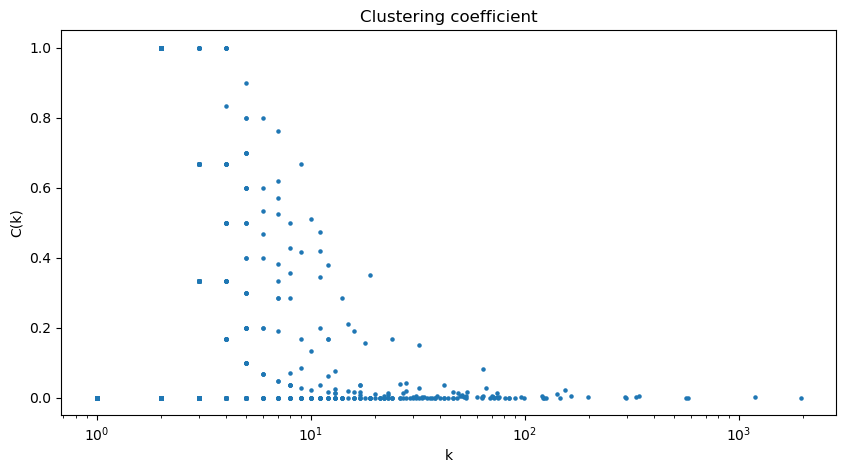

In [80]:
#distribution of clustering coeffient based on the degree k of the node
degrees = G.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(G,node) #calculate local clustering coefficient
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(10,5))
plt.scatter(x, y,s=5)
#plt.markersize('5')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("C(k)")
plt.title("Clustering coefficient")
plt.savefig('cluster_coefficient_distribution.pdf',format='pdf')

plt.show()

In [ ]:
#aggiungere Clustering coefficient distribution (nel report Sustrico)

In [19]:
#TRIANGOLI,TRIPLETS,GLOBAL CLUSTERING COEFF
#non sono riuscita a trovare il codice per le triplets...

In [85]:
#Density=L/Lmax i.e. n of links/ n of possible links
nx.density(G)

0.00023081149913380117

In [86]:
#calcolare la Density anche per ER,BA e WS

In [87]:
#as most real networks, even this one tends to be sparse i.e. it has very very few edges wrt the potential ones:
## <k> << N-1 ,
## L << Lmax ,
## D(G)=L/Lmax << 1.

### 2.1.5 Centrality analysis ##

In [ ]:
#Degree Centrality = dg
#Betweeness Centrality = bec
#Closeness Centrality = clc
#Harmonic Centrality = hac
#PageRank = prc

##### Degree Centrality 

In [89]:
nx.degree_centrality(G)
#how many neighbors does a node have?

{'290883': 9.820288716488265e-05,
 '1471971': 9.820288716488265e-05,
 '2052911': 0.0004910144358244132,
 '2827221': 9.820288716488265e-05,
 '3688111': 9.820288716488265e-05,
 '4254951': 9.820288716488265e-05,
 '4615341': 9.820288716488265e-05,
 '4937571': 9.820288716488265e-05,
 '5404582': 9.820288716488265e-05,
 '5516892': 9.820288716488265e-05,
 '5749002': 9.820288716488265e-05,
 '5849252': 9.820288716488265e-05,
 '6266142': 0.0001964057743297653,
 '6691762': 0.0010802317588137092,
 '7078452': 9.820288716488265e-05,
 '7703052': 9.820288716488265e-05,
 '7777302': 0.0001964057743297653,
 '8007502': 9.820288716488265e-05,
 '8052182': 9.820288716488265e-05,
 '9063952': 9.820288716488265e-05,
 '9147152': 9.820288716488265e-05,
 '9731332': 9.820288716488265e-05,
 '11025592': 9.820288716488265e-05,
 '11076222': 9.820288716488265e-05,
 '11486222': 9.820288716488265e-05,
 '11567702': 9.820288716488265e-05,
 '12512292': 9.820288716488265e-05,
 '12610772': 0.0004910144358244132,
 '13301942': 9.

In [90]:
#quali sono i nodi con la Degree centrality più alta?

In [99]:
dg = nx.degree_centrality(G)

In [100]:
#Massimi valori della Degree Centrality 
lista_degcentr = []
for v in dg.values():
    lista_degcentr.append(v)
m = max(lista_degcentr)
m

0.19208484729451045

In [93]:
for v in lista_degcentr: 
    if v == m :
        lista_degcentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_degcentr)
m

0.11745065304919965

In [94]:
for v in lista_degcentr: 
    if v == m :
        lista_degcentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_degcentr)
m

0.0565648630069724

In [ ]:
#a quali nodi corrispondono questi valori di DegCentr?

In [98]:
max_DegCentr1 = max(nx.degree_centrality(G), key = nx.degree_centrality(G).get)
print(max_DegCentr1)
#ma cosi trovo solo il Max.. 

27493883

In [ ]:
#per trovare gli altri 2 devo:

In [105]:
list_of_nodes = list(dg.keys())
list_of_degreecentralities = list(dg.values())

 #cerchiamo il nodo che ha degree centrality 0.19208484729451045
position = list_of_degreecentralities.index(0.19208484729451045)
print('1° degree centrality node :', list_of_nodes[position])

 #cerchiamo il nodo che ha degree centrality 0.11745065304919965
position = list_of_degreecentralities.index(0.11745065304919965)
print('2° degree centrality node :', list_of_nodes[position])

 #cerchiamo il nodo che ha degree centrality 0.0565648630069724
position = list_of_degreecentralities.index(0.0565648630069724)
print('3° degree centrality node :', list_of_nodes[position])


1° degree centrality node : 27493883

2° degree centrality node : 2956836471

3° degree centrality node : 4018888580

In [ ]:
#quindi i primi tre Max Degree Centrality sono:
#1° 0.19208484729451045 del nodo '27493883'
#2° 0.11745065304919965 del nodo '2956836471'
#3° 0.0565648630069724 del nodo '4018888580'

##### Closeness Centrality 

In [106]:
nx.closeness_centrality(G)

{'290883': 0.2224576734025123,
 '1471971': 0.21648914684184792,
 '2052911': 0.23828801422754714,
 '2827221': 0.22041125541125542,
 '3688111': 0.1615067406819984,
 '4254951': 0.13387762614709053,
 '4615341': 0.2517926907670244,
 '4937571': 0.22041125541125542,
 '5404582': 0.13195542309187508,
 '5516892': 0.22041125541125542,
 '5749002': 0.22195339915865647,
 '5849252': 0.20859109344913762,
 '6266142': 0.24089801518771733,
 '6691762': 0.15132106874312717,
 '7078452': 0.13387762614709053,
 '7703052': 0.13131052624792067,
 '7777302': 0.20796487286837537,
 '8007502': 0.22041125541125542,
 '8052182': 0.2224576734025123,
 '9063952': 0.13238773759068098,
 '9147152': 0.15926864364364365,
 '9731332': 0.2224576734025123,
 '11025592': 0.1788782124475205,
 '11076222': 0.21154205704551593,
 '11486222': 0.2517926907670244,
 '11567702': 0.19277587414573197,
 '12512292': 0.15464402867209331,
 '12610772': 0.2014361449596455,
 '13301942': 0.15124914594658825,
 '13525132': 0.19352692994792656,
 '13748912'

In [107]:
#anche per la closeness vedere i valori Max (se è normalizzata)

In [ ]:
#questa Closeness è normalizzata Ci = N-1 / somm li,j : quindi devo cercare i Max

In [111]:
clc = nx.closeness_centrality(G)

In [112]:
#Massimi valori della Closeness Centrality 
lista_closenesscentr = []
for v in clc.values():
    lista_closenesscentr.append(v)
m = max(lista_closenesscentr)
m

0.3365168539325843

In [113]:
for v in lista_closenesscentr: 
    if v == m :
        lista_closenesscentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_closenesscentr)
m

0.3077550773694391

In [114]:
for v in lista_closenesscentr: 
    if v == m :
        lista_closenesscentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_closenesscentr)
m

0.3014059493858221

In [ ]:
#a quali nodi corrispondono questi valori di ClosenessCentr?

In [115]:
#per trovare solo il 1°Max
max_ClosenessCentr1 = max(nx.closeness_centrality(G), key = nx.closeness_centrality(G).get)
print(max_ClosenessCentr1)
#ma cosi trovo solo il Max..

27493883

In [ ]:
#per trovare 1°,2° e 3°:
list_of_nodes = list(clc.keys())
list_of_closenesscentralities = list(clc.values())

 #cerchiamo il nodo che ha degree centrality ...
position = list_of_closenesscentralities.index(...)
print('1° closeness centrality node :', list_of_nodes[position])

 #cerchiamo il nodo che ha degree centrality ...
position = list_of_closenesscentralities.index(...)
print('2° closeness centrality node :', list_of_nodes[position])

 #cerchiamo il nodo che ha degree centrality ...
position = list_of_degreecentralities.index(...)
print('3° closeness centrality node :', list_of_nodes[position])


##### Betweeness Centrality

In [110]:
bc=nx.betweenness_centrality(G)

In [109]:
nx.betweenness_centrality(G)

{'290883': 0.0,
 '1471971': 0.0,
 '2052911': 9.495842676407755e-05,
 '2827221': 0.0,
 '3688111': 0.0,
 '4254951': 0.0,
 '4615341': 0.0,
 '4937571': 0.0,
 '5404582': 0.0,
 '5516892': 0.0,
 '5749002': 0.0,
 '5849252': 0.0,
 '6266142': 0.0,
 '6691762': 0.0019631897154205324,
 '7078452': 0.0,
 '7703052': 0.0,
 '7777302': 0.0001581609269835421,
 '8007502': 0.0,
 '8052182': 0.0,
 '9063952': 0.0,
 '9147152': 0.0,
 '9731332': 0.0,
 '11025592': 0.0,
 '11076222': 0.0,
 '11486222': 0.0,
 '11567702': 0.0,
 '12512292': 0.0,
 '12610772': 0.0004213958804664013,
 '13301942': 0.0,
 '13525132': 0.0,
 '13748912': 0.0,
 '14118020': 0.0,
 '14132126': 0.00021788144691674166,
 '14152382': 0.0,
 '14214964': 0.0,
 '14218303': 0.0,
 '14314815': 0.0,
 '14410543': 0.0,
 '14430522': 0.0,
 '14446152': 0.0,
 '14449273': 0.00038468546175520624,
 '14465456': 0.0,
 '14491785': 0.0,
 '14496536': 0.0012264214354990952,
 '14519073': 0.0001964057743297653,
 '14522241': 0.0,
 '14535500': 0.0,
 '14542602': 0.0,
 '14568965': 

In [32]:
#Massimi valori della Betweeness 
lista = []
for v in bc.values():
    lista.append(v)
m = max(lista)
m

In [33]:
for v in lista: 
    if v == m :
        lista.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista)
m

0.2131705400806046

In [ ]:
#il primo Max BE è 0.2131705400806046, ora lo togliamo dalla lista e andiamo a calcolare il secondo Max BE

In [34]:
for v in lista: 
    if v == m :
        lista.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista)
m

0.2052659423420334

In [ ]:
#il secondo Max BE è 0.2052659423420334, ora lo togliamo dalla lista e andiamo a calcolare il terzo Max BE

In [35]:
for v in lista: 
    if v == m :
        lista.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista)
m

0.15318886874856297

In [ ]:
#il terzo Max BE è 0.15318886874856297
#quindi i primi tre Max BE sono:
#1° 0.2131705400806046 del nodo ..
#2° 0.2052659423420334 del nodo ..
#3° 0.15318886874856297 del nodo ..

In [ ]:
#a quali nodi corrispondono questi valori di ClosenessCentr?

In [ ]:
#per trovare solo il 1°Max
max_BetwCentr1 = max(nx.betweenness_centrality(G), key = nx.betweenness_centrality(G).get)
print(max_BetwCentr1)
#ma cosi trovo solo il Max..

In [ ]:
#per trovare 1°,2° e 3°:
list_of_nodes = list(bc.keys())
list_of_betweennesscentralities = list(bc.values())

 #cerchiamo il nodo che ha degree centrality ...
position = list_of_betweennesscentralities.index(...)
print('1° betweenness centrality node :', list_of_nodes[position])

 #cerchiamo il nodo che ha degree centrality ...
position = list_of_betweennesscentralities.index(...)
print('2° betweenness centrality node :', list_of_nodes[position])

 #cerchiamo il nodo che ha degree centrality ...
position = list_of_betweennesscentralities.index(...)
print('3° betweenness centrality node :', list_of_nodes[position])


##### Harmonic Centrality

In [29]:
nx.harmonic_centrality(G)

{'1163385451287212032': 1862.0930236431805,
 '2361116313': 1393.2656704405904,
 '1246801249430917121': 1867.9576118327843,
 '747112729152987137': 2557.893795093766,
 '1039700950384963586': 2120.7090048840764,
 '911028990613364738': 1979.348290598456,
 '1162283523362787329': 1444.1183899433427,
 '1480014338534432770': 2400.827616827623,
 '1419360143712604162': 1096.3023698523418,
 '1459188554043731975': 2193.480735930831,
 '1520623903': 2400.827616827623,
 '1279024951949881344': 1395.6266178265444,
 '1014280152166092800': 1641.7188894439678,
 '16905638': 2938.9945887445724,
 '931978724790202368': 2201.0034104784695,
 '931131044803366912': 1540.0582528582781,
 '1472633051964448776': 2938.9945887445715,
 '1099674870118563841': 2569.6747474747176,
 '514733527': 2938.9945887445724,
 '430813580': 2004.3108419360199,
 '1427315580940394506': 2471.169283494273,
 '1264955455727697923': 2321.2802863802867,
 '2831916949': 1874.5909451661187,
 '563880180': 2403.2024170274117,
 '945760285771599872':

##### Page Rank

In [30]:
nx.pagerank(G)

{'290883': 4.5437423818097003e-05,
 '1471971': 4.940059012949059e-05,
 '2052911': 0.00013487331532834653,
 '2827221': 4.974232535317275e-05,
 '3688111': 5.2142287007014004e-05,
 '4254951': 5.366620681499014e-05,
 '4615341': 4.890618736280352e-05,
 '4937571': 4.974232535317275e-05,
 '5404582': 5.2417412437707206e-05,
 '5516892': 4.974232535317275e-05,
 '5749002': 4.7510229678267674e-05,
 '5849252': 4.2948711620318996e-05,
 '6266142': 6.769309717485263e-05,
 '6691762': 0.0005243336711437126,
 '7078452': 5.366620681499014e-05,
 '7703052': 5.712852697893742e-05,
 '7777302': 7.820632812526889e-05,
 '8007502': 4.974232535317275e-05,
 '8052182': 4.5437423818097003e-05,
 '9063952': 5.36842002179685e-05,
 '9147152': 5.2438495700116955e-05,
 '9731332': 4.5437423818097003e-05,
 '11025592': 4.6459382941047663e-05,
 '11076222': 4.61812148620732e-05,
 '11486222': 4.890618736280352e-05,
 '11567702': 4.7670681751473095e-05,
 '12512292': 4.55681633653309e-05,
 '12610772': 0.0001896210218869983,
 '13301

##### Assortativity

In [ ]:
nx.degree_assortativity_coefficient(G)

In [ ]:
#assortative mixing vedere la prob che se c'è un link fra 2 nodi, questi 2 nodi sono della stessa categoria

In [ ]:
#vedere l'assortative mixing anche per t1 e t2 assumendo che il link sia lo stesso ma le categorie sono cambiate 

In [ ]:
##vedere tutte queste misure Max a che nodi corrispondono nella rete con gephi 

## 2.2 Synthethic graphs ##

In [ ]:
#Barabasi-Albert BA
#Erdos-Renyi ER
#Watts-Strogatz WS
#Configuration Model CM

### 2.2.1 Erdos-Renyi model ###

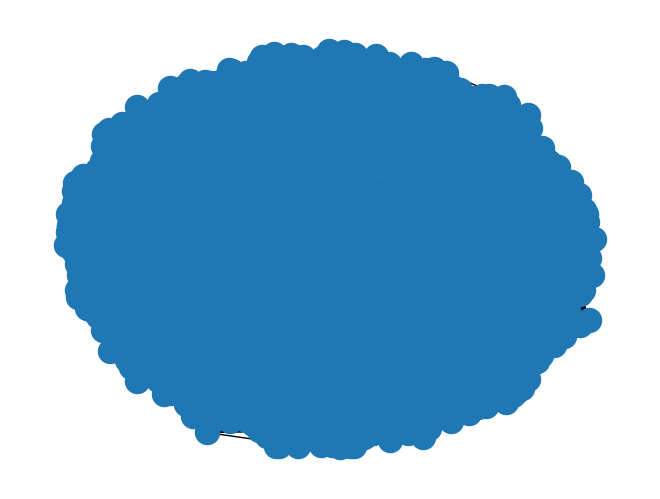

In [22]:
#ER (random graphs)
er = nx.erdos_renyi_graph(10184,0.05)
nx.draw(er)

In [23]:
#n of Nodes
er.number_of_nodes()

10184

In [24]:
#n of Edges
er.number_of_edges()

2593029

In [ ]:
#con p=0.05 otteniamo L=2593029..
#vogliamo trovare la p che ci dia un ER con un L simile al nostro L=11968

In [25]:
#ER (random graphs)
#proviamo con p=0.005
er = nx.erdos_renyi_graph(10184,0.005)

In [26]:
#n of Edges
er.number_of_edges()

260024

In [29]:
#ER (random graphs)
#proviamo con p=0.0025
er = nx.erdos_renyi_graph(10184,0.0025)

In [30]:
#n of Edges
er.number_of_edges()

129594

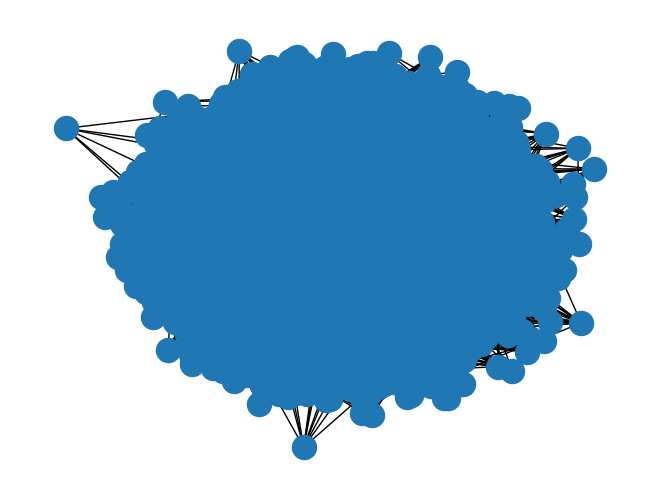

In [43]:
#ER (random graphs)
er = nx.erdos_renyi_graph(10184,0.0025)
nx.draw(er)

In [ ]:
#con p=0.0025 otteniamo un ER con L=129594 che è simile al nostro L=11968

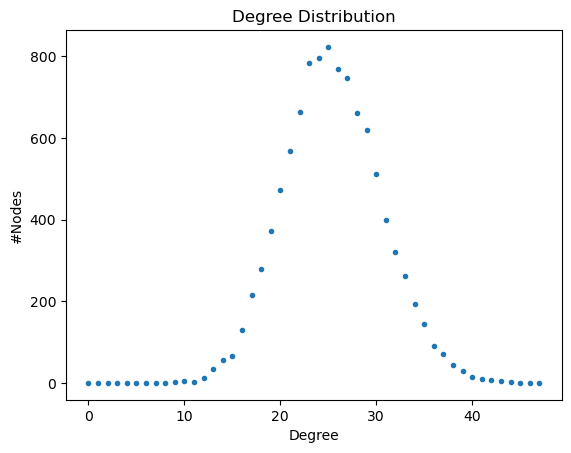

In [31]:
#ER degree distribution
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

In [ ]:
#avg degree, Max degree, min degree di ER

In [37]:
#Average Degree <k> of ER
sum(dict(er.degree()).values())/float(len(er))

25.450510604870384

In [38]:
#def n of nodes for ER
#n_nodes = er.number_of_nodes()

In [39]:
#def n of edges for ER
#n_edges = er.number_of_edges

In [40]:
#avg_degree = (2*n_edges)/n_nodes

In [41]:
maxdegree=max(dict(er.degree()).values())
mindegree=min(dict(er.degree()).values())

In [42]:
print(maxdegree,mindegree)
#Max degree = 47
#min degree = 9

47 9

In [ ]:
#regimi?

### 2.2.2 Barabasi-Albert model ###

In [ ]:
#A graph of n nodes is grown by attaching new nodes each with m edges that are preferentially attached to existing nodes with high degree.

In [44]:
m = 7  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(10184, m)
#nx.draw(ba)

In [50]:
#n of Nodes
ba.number_of_nodes()

10184

In [45]:
#n of Edges
ba.number_of_edges()

71239

In [ ]:
#m=7 è troppo alto..

In [ ]:
#cerchiamo di trovare la m che ci dia un BA con un L simile al nostro L=11968

In [46]:
m = 2  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(10184, m)
#nx.draw(ba)

In [47]:
#n of Edges
ba.number_of_edges()

20364

In [ ]:
#m=2 è ancora troppo alto

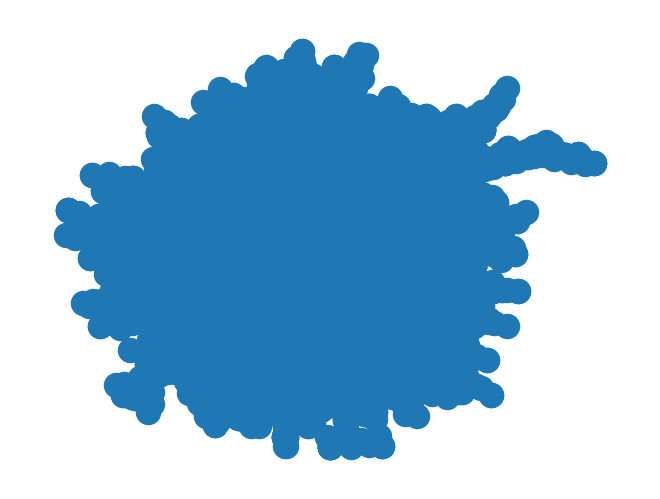

In [55]:
m = 1  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(10184, m)
nx.draw(ba)

In [49]:
#n of Edges
ba.number_of_edges()

10183

In [ ]:
#con m=1 otteniamo un L per il BA che + simile al nostro L=11968

In [ ]:
#cerchiamo di trovare la m che ci dia un BA con un L simile al nostro L=11968

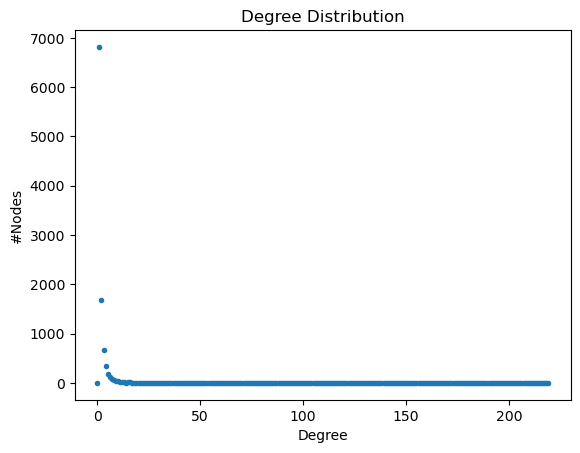

In [51]:
#BA degree distribution
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

In [77]:
#Average Degree <k> of BA
sum(dict(ba.degree()).values())/float(len(ba))

1.9998036135113904

In [78]:
maxdegree=max(dict(ba.degree()).values())
mindegree=min(dict(ba.degree()).values())

In [79]:
print(maxdegree,mindegree)
#Max degree BA = 115
#min degree BA = 1

115 1

In [57]:
def degree_dist_plot(graphs):
    fig = plt.figure(figsize=(16,8))
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dictionary node:degree
        else:
            degrees = i[0].degree() # dictionary node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o-') # in-degree
        else:
            plt.loglog(values, hist, 'o') # in-degree
    fontsize = 15
    
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xlim([0, 2*10**2])
    
    plt.show()

C:\Users\Giulia\AppData\Local\Temp\ipykernel_4116\757876449.py:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 2*10**2])


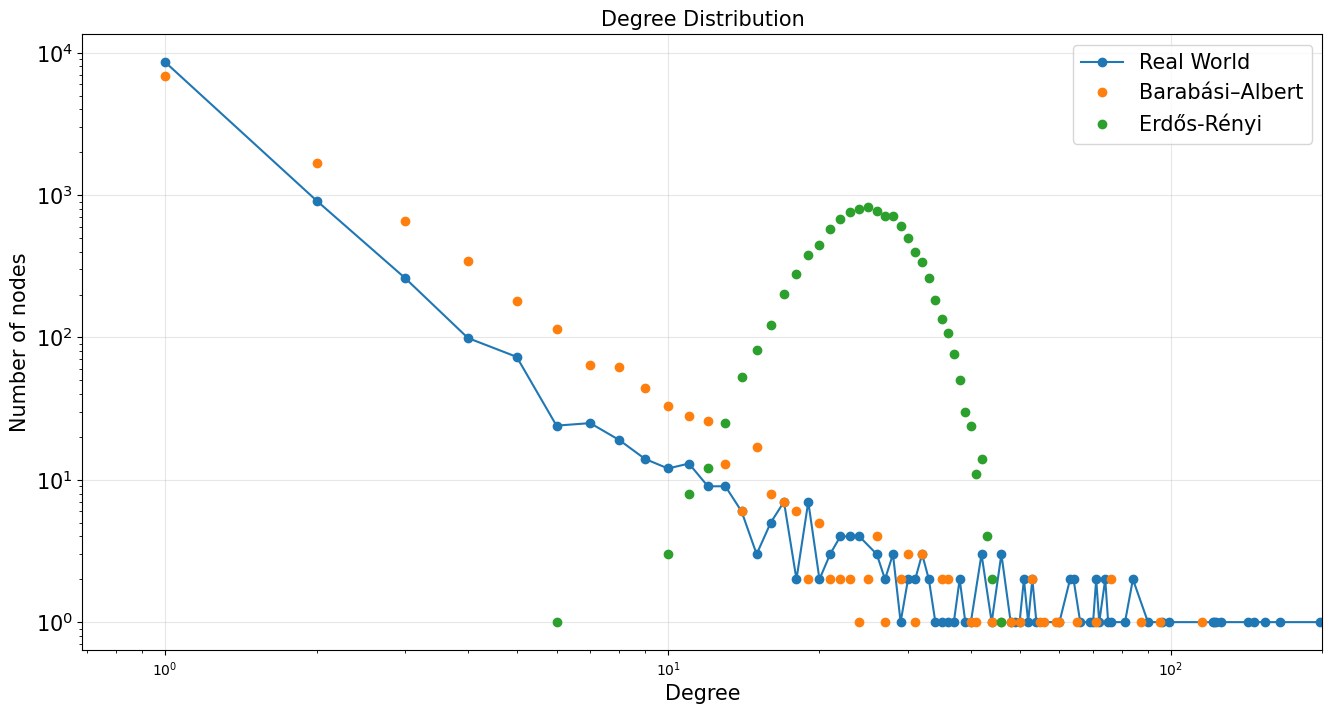

In [58]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi")]
degree_dist_plot(graphs)
#ci dobbiamo aggiungere il WS

### 2.2.3 Watts-Strogatz model ###

In [ ]:
#from p=0 Regular model, to small world in between, to p=1 fully random model
#Each node is joined with its k nearest neighbors in a ring topology.

In [62]:
# Watts-Strogatz model small-world regime (0.001 < p < 0.1)
ws = nx.watts_strogatz_graph(10184, k=4, p=0.05)
#nx.draw(ws)

In [63]:
#n of Nodes
ws.number_of_nodes()

10184

In [64]:
#n of Edges
ws.number_of_edges()

20368

In [ ]:
#con p=0.05 il n di link è troppo alto
#dobbiamo trovare la p che ci dia un L simile al nostro L=11968

In [65]:
# Watts-Strogatz model small-world regime (0.001 < p < 0.1)
ws = nx.watts_strogatz_graph(10184, k=4, p=0.1)
#nx.draw(ws)

In [66]:
#n of Edges
ws.number_of_edges()

20368

In [67]:
# Watts-Strogatz model small-world regime (0.001 < p < 0.1)
ws = nx.watts_strogatz_graph(10184, k=4, p=0.2)
#nx.draw(ws)

In [68]:
#n of Edges
ws.number_of_edges()

20368

In [ ]:
#L non dipende da p, proviamo a cambiare k

In [73]:
# Watts-Strogatz model small-world regime (0.001 < p < 0.1)
ws = nx.watts_strogatz_graph(10184, k=3, p=0.05)
#nx.draw(ws)

In [74]:
#n of Edges
ws.number_of_edges()

10184

In [ ]:
#con k=3 abbiamo L=10184 che è simile al nostro L=11968

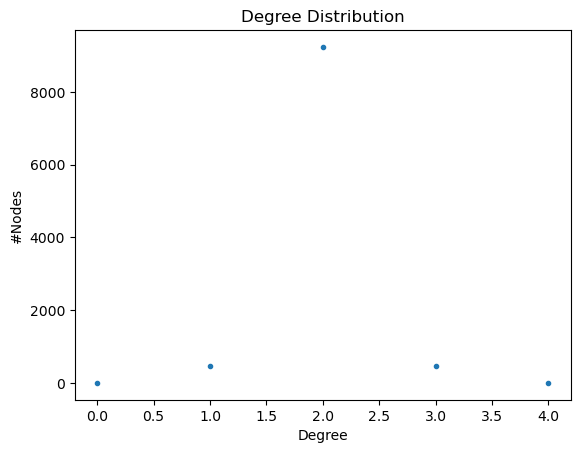

In [75]:
#BA degree distribution
hist = nx.degree_histogram(ws)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

In [76]:
#Average Degree <k> of WS
sum(dict(ws.degree()).values())/float(len(ws))

2.0

In [80]:
maxdegree=max(dict(ws.degree()).values())
mindegree=min(dict(ws.degree()).values())

In [81]:
print(maxdegree,mindegree)
#Max degree WS = 4
#min degree WS = 1

4 1

C:\Users\Giulia\AppData\Local\Temp\ipykernel_4116\757876449.py:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 2*10**2])


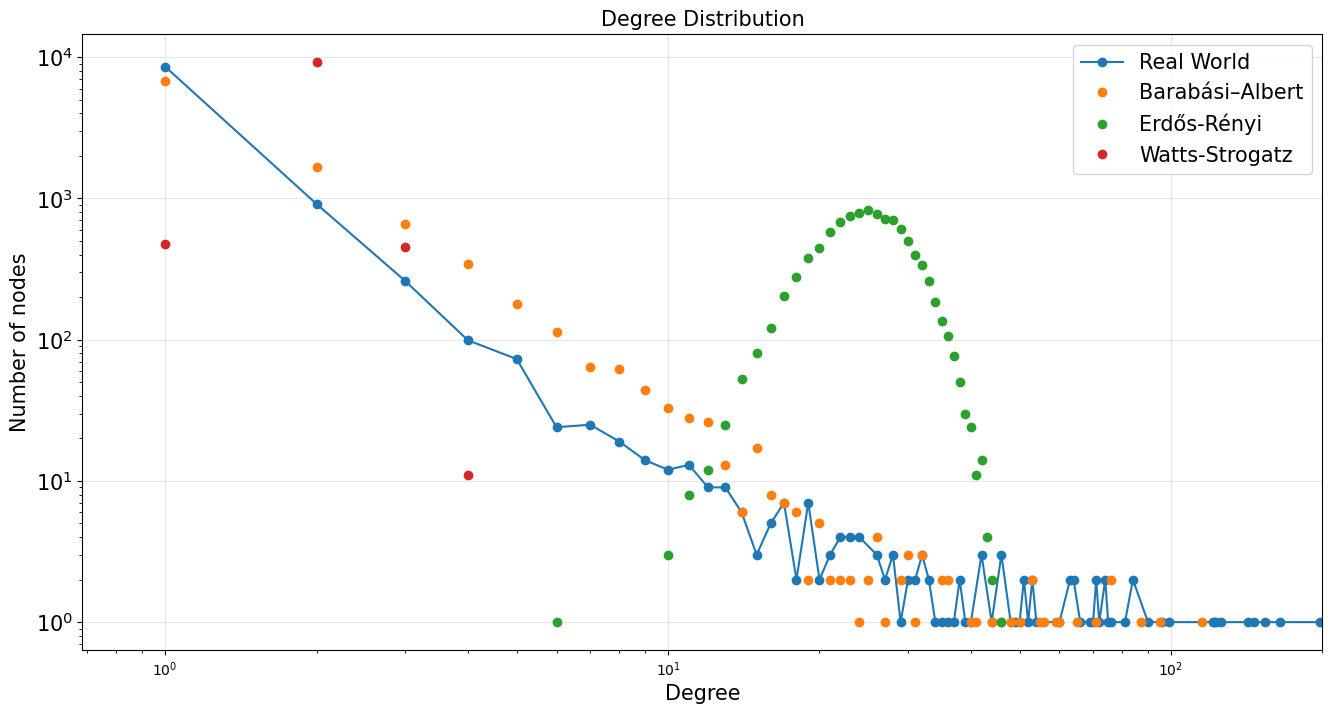

In [82]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"),(ws,"Watts-Strogatz")]
degree_dist_plot(graphs)